- EMNIST Digits: Este subconjunto es similar al MNIST y contiene solo los dígitos del 0 al 9. Las etiquetas son números enteros del 0 al 9.

- EMNIST Letters: Contiene letras en mayúsculas y minúsculas. Las etiquetas aquí son letras del alfabeto (A-Z) con un solo valor por cada letra, ya que están en un formato balanceado. Representan letras manuscritas de la A a la Z y se codifican con valores enteros del 1 al 26.

- EMNIST Balanced: Contiene tanto dígitos (0-9) como letras (mayúsculas y minúsculas) en una mezcla equilibrada, lo que da un total de 47 clases. Las etiquetas aquí son números enteros que representan:
Dígitos del 0 al 9, Letras en un único formato (sin diferencia entre mayúsculas y minúsculas).

- EMNIST ByClass: Este es el conjunto más completo y contiene tanto letras en mayúsculas como en minúsculas, además de los dígitos. Aquí hay 62 clases en total (10 dígitos y 52 letras diferenciando entre mayúsculas y minúsculas).

- EMNIST ByMerge: Similar a ByClass, pero en este conjunto las letras no están diferenciadas por mayúsculas y minúsculas, y el total de clases es 47.

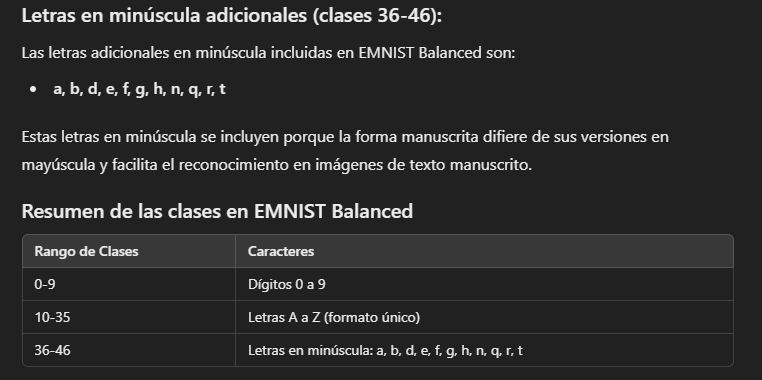

In [5]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets. # type: ignore
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Classifier from scikit-learn. # type: ignore
from sklearn.metrics import accuracy_score  # Measures the accuracy of a model by comparing predictions with actual labels. # type: ignore
from sklearn.datasets import fetch_openml  # Allows downloading datasets from OpenML. # type: ignore
import numpy as np  # Library for numerical operations. # type: ignore

emnist = fetch_openml('EMNIST_Balanced', version=1)
X, y = emnist["data"]/ 255, emnist["target"]

y = y.astype(np.int8)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# The 'random_state' parameter ensures that the split is reproducible with a fixed seed value (e.g., 42).
n = X_train.shape[0]
print(f"Rows to train: {n}")
m = X_test.shape[0]
print(f"Rows to test: {m}")


mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 128),  # Two hidden layers: 256 neurons in the first, 128 in the second.
    max_iter=2000,                  # Maximum of 2000 epochs for training.
    activation="relu",              # Activation function for hidden layers.
    solver="sgd",                   # Optimization algorithm: Stochastic Gradient Descent.
    verbose=1,                      # Verbose mode to print messages during training.
    random_state=42,                # Seed for random number generation.
    learning_rate_init=0.001,        # Initial learning rate.
    batch_size=256                 # Batch size for training.
)

# A batch of 65_536 paso 0.12 Model accuracy: 81.39%
# A batch of 65_536 paso 0.06 Model accuracy: 84.11%

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Rows to train: 92120
Rows to test: 39480
Iteration 1, loss = 3.87719333
Iteration 2, loss = 3.83606711
Iteration 3, loss = 3.78693005
Iteration 4, loss = 3.73135526
Iteration 5, loss = 3.66182066
Iteration 6, loss = 3.57004680
Iteration 7, loss = 3.45011940
Iteration 8, loss = 3.29369293
Iteration 9, loss = 3.09626758
Iteration 10, loss = 2.86233014
Iteration 11, loss = 2.60540663
Iteration 12, loss = 2.35597209
Iteration 13, loss = 2.15187974
Iteration 14, loss = 2.27322792
Iteration 15, loss = 3.72615531
Iteration 16, loss = 3.41175685
Iteration 17, loss = 2.69157600
Iteration 18, loss = 2.64799549
Iteration 19, loss = 2.52742358
Iteration 20, loss = 2.32676162
Iteration 21, loss = 2.12031378
Iteration 22, loss = 1.95138344
Iteration 23, loss = 1.81607069
Iteration 24, loss = 1.71075513
Iteration 25, loss = 1.61455994
Iteration 26, loss = 1.51576935
Iteration 27, loss = 1.46696103
Iteration 28, loss = 1.41312684
Iteration 29, loss = 1.36002101
Iteration 30, loss = 1.31971622
Iteratio

Draw a character and press 'Enter' to predict it.
The image is probably a: a


c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


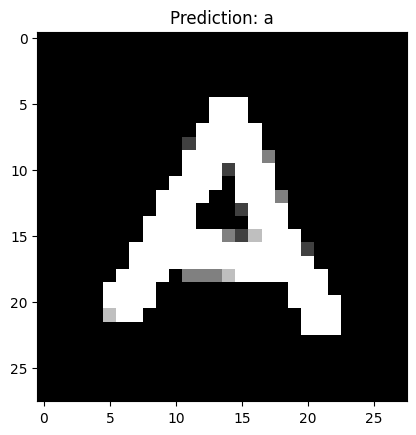

In [26]:
import matplotlib.pyplot as plt  # For displaying the drawn image and prediction.
import numpy as np  # For numerical operations.
import cv2  # For creating the drawing window and handling the drawing input.

# Diccionario de mapeo de clases para EMNIST Balanced
emnist_classes = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e',
    40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

# Create a window for drawing
drawing = False  # Controls the drawing state
last_point = None  # Stores the last point drawn

# Mouse callback function
def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), 30)  # Draw with a thickness of 30, in white
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_point = None

# Create a black canvas of 200x200 pixels
canvas = np.zeros((200, 200), dtype=np.uint8)  # uint8 ranges from 0 to 255 (1 byte)

# Create a window and register the mouse callback
cv2.namedWindow("Drawing Window")
cv2.setMouseCallback("Drawing Window", mouse_callback)

print("Draw a character and press 'Enter' to predict it.")

# Display the drawing window and listen for the Enter key to proceed
while True:
    cv2.imshow("Drawing Window", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # Enter key
        break
    elif key == 27:  # Escape key clears the canvas
        canvas.fill(0)

cv2.destroyAllWindows()

# Function to preprocess the drawn image for prediction
def preprocess_image(img):
    # Resize the image to 20x20 pixels
    img_resized = cv2.resize(img, (20, 20))
    
    # Create a new 28x28 pixel canvas and place the resized image in the center
    img_with_border = np.zeros((28, 28), dtype=np.uint8)
    img_with_border[4:24, 4:24] = img_resized
    
    # Normalize to the range 0-1 and flatten for prediction
    img_with_border = img_with_border / 255.0
    img_with_border = img_with_border.flatten()  # Convert to a vector of 784 elements
    return img_with_border

# Preprocess the drawn image
processed_image = preprocess_image(canvas)
processed_image = processed_image.reshape(1, -1)  # Reshape to (1, 784) for the model

# Make a prediction using the trained model
prediction = mlp.predict(processed_image)
predicted_class = emnist_classes[int(prediction[0])]

# Display the prediction and the preprocessed image
print(f"The image is probably a: {predicted_class}")
plt.imshow(processed_image.reshape(28, 28), cmap="gray")
plt.title(f"Prediction: {predicted_class}")
plt.show()


Prediction for the image: [24]


c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


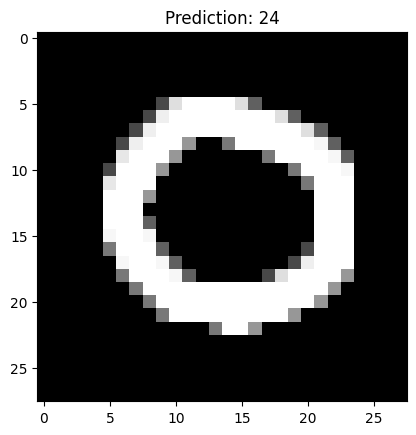

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [46]


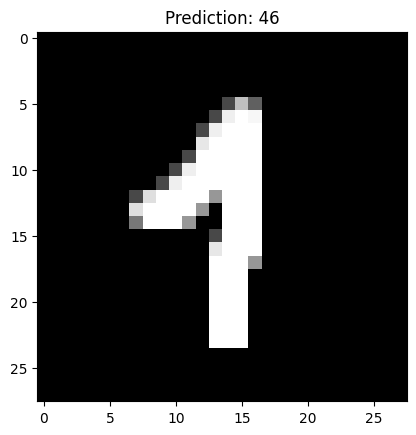

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [30]


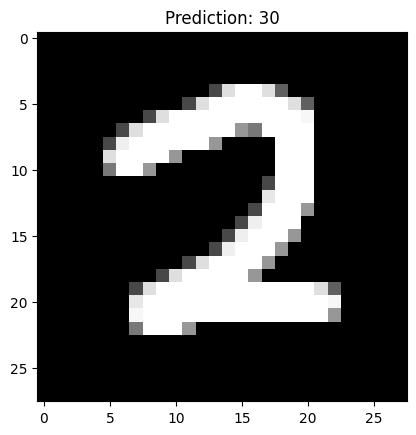

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [32]


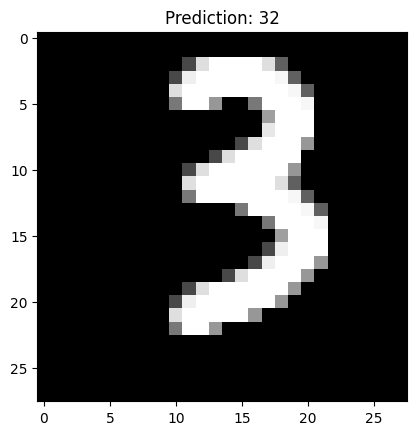

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [35]


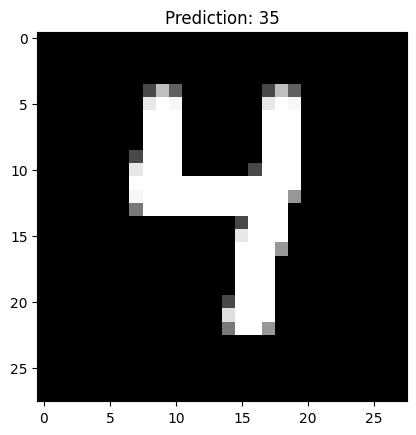

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [43]


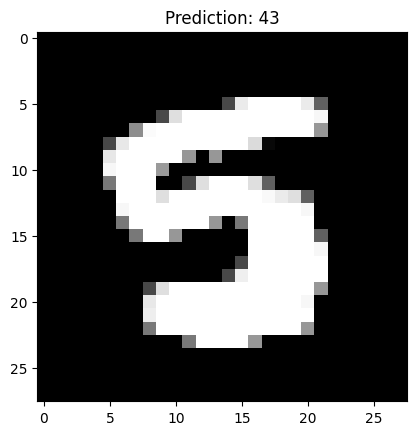

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [10]


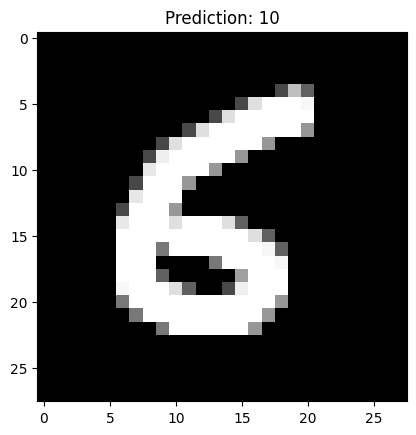

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [31]


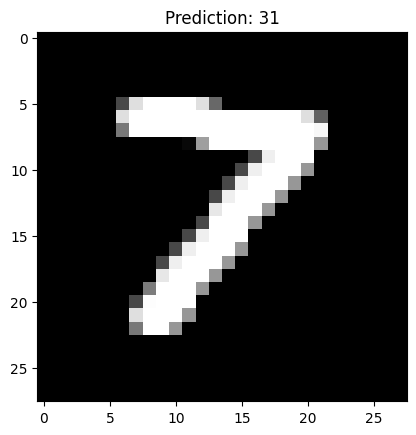

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [12]


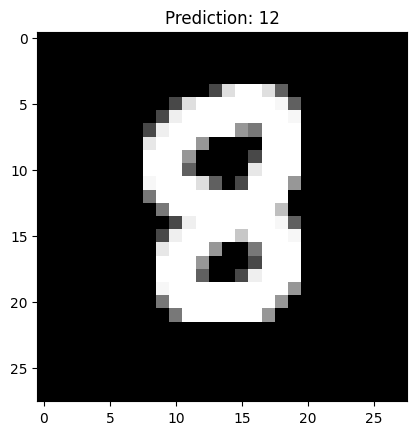

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediction for the image: [24]


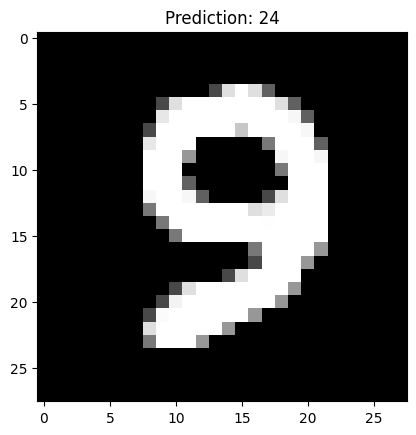

In [19]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import cv2 # type: ignore

# Function to preprocess an image (28x28 pixels, grayscale)
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale, removing any RGB channels
    img_resized = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img_resized = img_resized / 255.0  # Normalize from 0 to 1
    img_resized = img_resized.flatten()  # Flatten the image to a vector of 784 elements
    return img_resized

for i in range(10):
    image_path = f"digits/digitB{i}.png"
    processed_image = preprocess_image(image_path)

    processed_image = processed_image.reshape(1, -1)  # Reshape from (784,) to (1, 784) for prediction

    prediction = mlp.predict(processed_image)
    print(f"Prediction for the image: {prediction}")

    # Reshape back to 28x28 for visualization to see what the machine "sees"
    plt.imshow(processed_image.reshape(28, 28), cmap="gray")
    plt.title(f"Prediction: {prediction[0]}")
    plt.show()
